In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [11]:
df_train=pd.read_csv('train_mobile.csv')

In [12]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [13]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [14]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<AxesSubplot:>

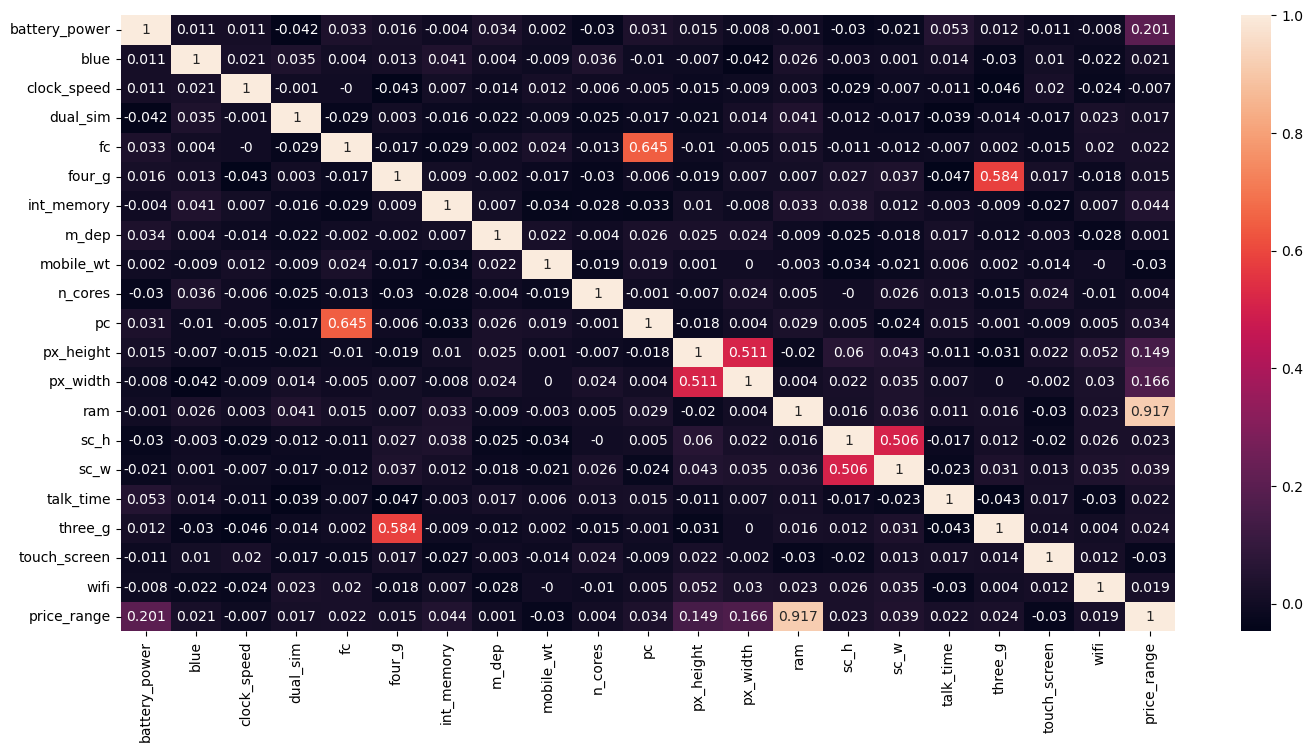

In [20]:
plt.figure(figsize=(17,8))
sns.heatmap(round(df_train.corr(),3),annot=True,fmt='.5g')


In [32]:
from sklearn.feature_selection import mutual_info_regression

In [26]:
X_train=df_train.drop(['price_range'],axis=1)

In [58]:
y=df_train['price_range']

In [37]:
mut=mutual_info_regression(X_train,y_train)

In [38]:
feat=pd.Series(mut,X_train.columns[0:len(X.columns)])

In [39]:
feat.plot()

battery_power    0.029844
blue             0.002782
clock_speed      0.000000
dual_sim         0.018906
fc               0.000000
four_g           0.000000
int_memory       0.002614
m_dep            0.000000
mobile_wt        0.013102
n_cores          0.000000
pc               0.012554
px_height        0.028426
px_width         0.030630
ram              0.846593
sc_h             0.013173
sc_w             0.017364
talk_time        0.000000
three_g          0.000000
touch_screen     0.000000
wifi             0.034813
dtype: float64

<AxesSubplot:>

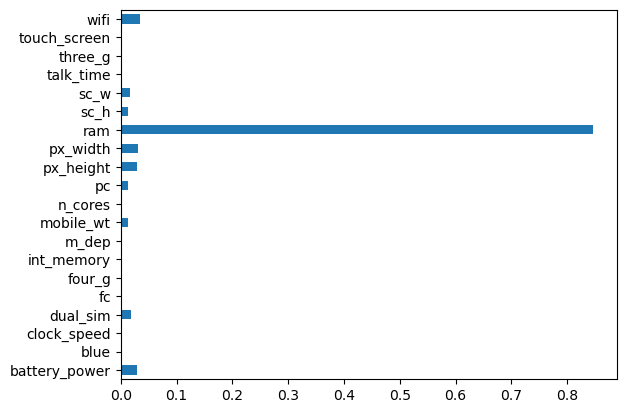

In [40]:
feat.plot(kind='barh')

In [57]:
X=df_train[['wifi','ram','px_width','px_height','pc','mobile_wt','dual_sim','battery_power']]

In [44]:
from sklearn.preprocessing import StandardScaler

In [56]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [60]:
ss=StandardScaler()

In [61]:
X_train_scaled=ss.fit_transform(X_train)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
linear=LinearRegression()

In [64]:
linear.fit(X_train_scaled,y_train)

LinearRegression()

In [66]:
linear.score(X_train_scaled,y_train)

0.9172944250919722

In [68]:
X_test_scaled=ss.transform(X_test)

In [71]:
y_pred=linear.predict(X_test_scaled)

In [74]:
y_pred=[round(value) for value in y_pred]

In [76]:
from sklearn.metrics import confusion_matrix,classification_report,r2_score

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      0.85      0.92       169
           1       0.87      0.98      0.92       162
           2       0.82      0.97      0.89       162
           3       1.00      0.77      0.87       167
           4       0.00      0.00      0.00         0

    accuracy                           0.89       660
   macro avg       0.62      0.59      0.60       660
weighted avg       0.92      0.89      0.90       660



C:\Users\Samorjit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Samorjit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Samorjit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


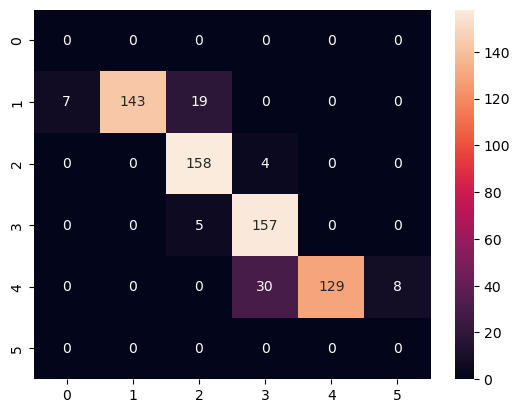

In [77]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.5g')
print(classification_report(y_test,y_pred))

In [78]:
r2_score(y_test,y_pred)

0.9127823305473641

In [79]:
from sklearn.tree import DecisionTreeRegressor

In [96]:
dt=DecisionTreeRegressor()

In [97]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [98]:
dt.score(X_train,y_train)

1.0

In [99]:
y_pred=dt.predict(X_test)

In [100]:
y_pred=[round(value) for value in y_pred]

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       169
           1       0.76      0.84      0.80       162
           2       0.80      0.75      0.77       162
           3       0.91      0.89      0.90       167

    accuracy                           0.84       660
   macro avg       0.85      0.84      0.84       660
weighted avg       0.85      0.84      0.84       660



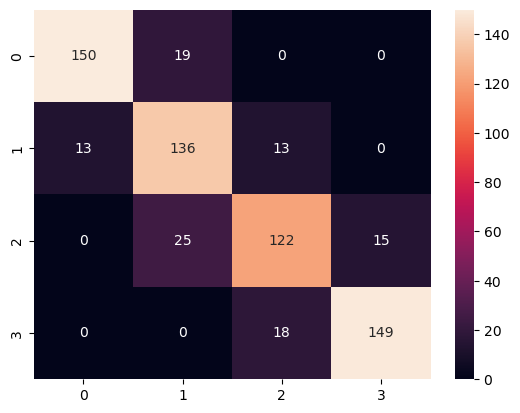

In [101]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.5g')
print(classification_report(y_test,y_pred))

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
rt=RandomForestRegressor(n_estimators=100,max_depth=6)

In [104]:
rt.fit(X_train,y_train)

RandomForestRegressor(max_depth=6)

In [106]:
rt.score(X_train,y_train)

0.9742621546281938

In [109]:
y_pred=[round(value) for value in rt.predict(X_test)]

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       169
           1       0.86      0.88      0.87       162
           2       0.85      0.86      0.86       162
           3       0.94      0.92      0.93       167

    accuracy                           0.90       660
   macro avg       0.90      0.90      0.90       660
weighted avg       0.90      0.90      0.90       660



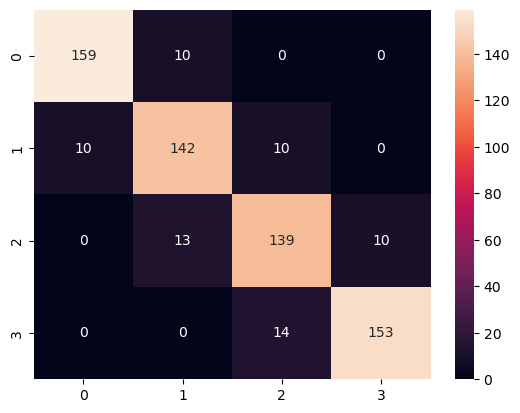

In [110]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.5g')
print(classification_report(y_test,y_pred))